# 比特币价格预测挑战

## 挑战介绍

![bitcoin](https://ws1.sinaimg.cn/large/006tNbRwly1fvcmqupj7pj30c103lgm1.jpg)

> 比特币（英语：Bitcoin，缩写：BTC）被部分观点认为是一种去中心化，非普遍全球可支付的电子加密货币，而多数国家则认为比特币属于虚拟商品，并非货币。比特币由中本聪（化名）于 2009 年 1 月 3 日，基于无国界的对等网络，用共识主动性开源软件发明创立。自比特币出现至今为止，比特币一直是目前法币市场总值最高的加密货币。([维基百科](https://zh.wikipedia.org/wiki/%E6%AF%94%E7%89%B9%E5%B8%81))

一段时间以来，比特币的价值饱受质疑。有人认为是严重的「泡沫」，也有人认为是物有所值。但无论哪一种观点，我们都见证了比特币暴涨暴跌。本次挑战收集到了 `2010-2018` 年比特币历史数据。其中包含交易价格、区块数量、交易费率等信息。我们将尝试使用多项式回归和岭回归方法来预测比特币价格变化趋势。

In [150]:
# 先导入常用分析的依赖包
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [151]:
# 下载数据
!wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-2-bitcoin.csv

--2018-09-18 14:47:03--  http://labfile.oss.aliyuncs.com/courses/1081/challenge-2-bitcoin.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 764011 (746K) [text/csv]
Saving to: ‘challenge-2-bitcoin.csv.1’

challenge-2-bitcoin 100%[===================>] 746.10K   735KB/s    in 1.0s    

2018-09-18 14:47:39 (735 KB/s) - ‘challenge-2-bitcoin.csv.1’ saved [764011/764011]



In [152]:
df = pd.read_csv('challenge-2-bitcoin.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [153]:
# 选取三列
data = df[['btc_market_price','btc_total_bitcoins','btc_transaction_fees']]
data.head()

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0
1,0.0,2120200.0,0.0
2,0.0,2127600.0,0.0
3,0.0,2136100.0,0.0
4,0.0,2144750.0,0.0


---

**<font color='red'>挑战</font>：分别绘制 `data` 数据集 3 列数据的线形图，并以横向子图排列。**<br>
**<font color='brown'>要求</font>**：需设置各图横纵轴名称，横轴统一为 `time`，纵轴为各自列名称。<br>
**<font color='green'>提示</font>**：使用 `set_xlabel()` 设置横轴名称。

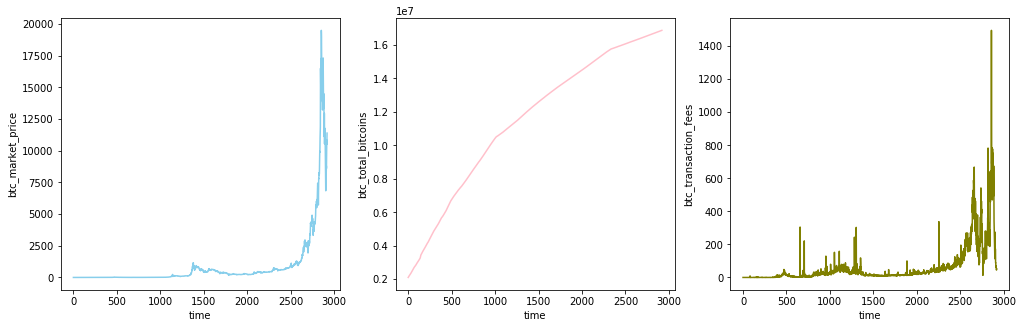

In [154]:
'''绘制图像
'''
fig,ax = plt.subplots(1,3,figsize=(17,5))

# ax[0].plot(data.index,data.iloc[:,i],color='red')
# ax[0].set_xlabel('time')
# ax[0].set_ylabel(data.columns[0])

colors=['#87CEEB','#FFC0CB','#808000']
for i in range(0,3):
    ax[i].plot(data.index,data.iloc[:,i],colors[i])
    ax[i].set_xlabel('time')
    ax[i].set_ylabel(data.columns[i])

本次挑战中，数据集的特征（features）是`比特币总量`和`比特币交易费用`，而目标值为`比特币市场价格`。所以，下面将数据集拆分为训练集和测试集。其中，训练集占 `70%`，而测试集占 `30%`。

---

**<font color='red'>挑战</font>：划分 `data` 数据集，使得训练集占 `70%`，而测试集占 `30%`。**

**<font color='brown'>要求</font>**：训练集特征、训练集目标、测试集特征、测试集目标分别定义为 `train_x`, `train_y`, `test_x`, `test_y`，并作为 `split_dataset()` 函数返回值。

In [155]:
"""划分数据集函数
"""

def split_dataset(k,data):
    """
    参数:
    k:表示训练集占k%,测试集(1-k)%

    返回:
    train_x, train_y, test_x, test_y -- 训练集特征、训练集目标、测试集特征、测试集目标
    """
    split_num = int(round(data.shape[0]*k/100))  #划分数
    
    x = data.iloc[:,1:3]
    y = data.iloc[:,0]
    
    train_x = x.iloc[:split_num,:]    #注意这里划分训练集和测试集都是针对行来划分的
    test_x = x.iloc[split_num:,:]
    
    train_y = y.iloc[:split_num]
    test_y = y.iloc[split_num:]
    
    return train_x, train_y, test_x, test_y

# 小结，1.split_num必须是int
#      2.注意 一维的y,是无法用两维的slice!!!

### n 次多项式回归预测挑战

划分完训练数据和测试数据之后，就可以构建多项式回归预测模型。挑战要求使用 scikit-learn 完成。

In [156]:
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [157]:
#加载数据集
train_x = split_dataset(70,data=data)[0]
train_y = split_dataset(70,data=data)[1]
test_x = split_dataset(70,data=data)[2]
test_y = split_dataset(70,data=data)[3]

In [184]:
train_x.shape
test_y.shape
data.shape

(2920, 3)

---

**<font color='red'>挑战</font>：构建 n 次多项式回归预测模型**

**<font color='brown'>要求</font>**：使用 scikit-learn 构建 n 次多项式回归预测模型，并计算预测结果的 MAE 评价指标，同时作为 `poly_n()` 函数返回值。

In [177]:
# 先用make_pipline写一个流，然后再写个 polyn

from sklearn.pipeline import make_pipeline
def array_reshape(x):
    """
    将对应的训练集和测试集转成 np.array格式
    """
    x_reshape = np.array(x)
    return x_reshape

def poly_n(n,train_x,train_y,test_x,test_y):
    """
    输入参数：
    train_x,train_y,test_x,test_y
    
    返回：
    """
    train_x = array_reshape(train_x)
    train_y = array_reshape(train_y)
    test_x = array_reshape(test_x)
    test_y = array_reshape(test_y)

#     para = PolynomialFeatures(degree=n,include_bias=False)
#     poly_x = para.fit_transform(x_reshape)
    
#     model = LinearRegression()
#     model.fit(poly_x,y)
    # 这里用make_pipeline改写
    # from sklearn.pipeline import make_pipeline
    
    model = make_pipeline(PolynomialFeatures(n, include_bias=False), LinearRegression())
    model.fit(train_x,train_y)
    pre_y = model.predict(test_x)
    
#     mae = mean_absolute_error(test_y.flatten(),pre_y.flatten())
    mse = mean_squared_error(test_y.flatten(),pre_y.flatten())
    return mse, model

In [178]:
# 测试一下
poly_n(2,train_x,train_y,test_x,test_y)

(16328564.107947402, Pipeline(memory=None,
      steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]))

2 : 13999821.66000822


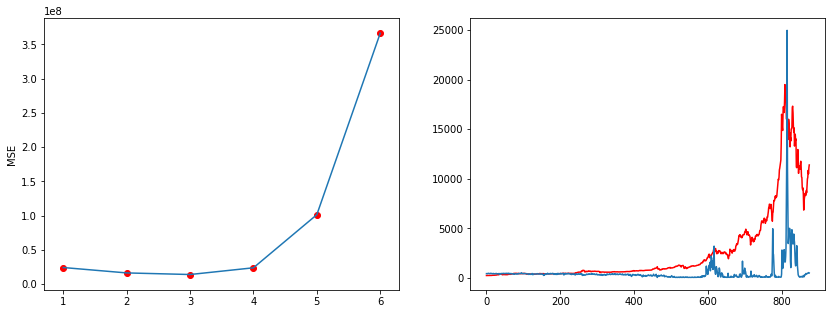

In [193]:
mse_list=[]
for i in range(1,10):
    mse_list.append(poly_n(i,train_x,train_y,test_x,test_y)[0])
print(mse_list.index(min(mse_list)),":",min(mse_list)) # 可用format改进一下

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].plot(np.arange(1,7),mse_list[0:6])
ax[0].set_ylabel('MSE')
ax[0].scatter(np.arange(1,7),mse_list[0:6],color='red')

# x_tmp=np.linspace(2044,2920,10000)
model = poly_n(2,train_x,train_y,test_x,test_y)[1]
ax[1].plot(np.array(test_y),'r')
ax[1].plot(model.predict(test_x))